Robert Rosen Machine Learning Project 1 9/12/23

A statistical analysis of students and the impact of hours studied on exam score improvement.

In [38]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.impute import SimpleImputer

# Set random seed for reproducibility
np.random.seed(42)

# Generate synthetic data
num_students = 100
student_ids = np.arange(1, num_students + 1)
sex = np.random.choice(["Male", "Female"], size=num_students)
ages = np.random.randint(16, 21, size=num_students)
study_hours = np.random.randint(2, 11, size=num_students)
previous_scores = np.random.randint(60, 101, size=num_students)
final_scores = previous_scores + study_hours + np.random.randint(-10, 6, size=num_students)
improvement = final_scores - previous_scores
average_improvement = np.mean(improvement)





# Clip final scores to be within a reasonable range (0-100)
final_scores = np.clip(final_scores, 0, 100)

# Clip male data

# Convert final scores to integers
final_scores = final_scores.astype(int)

# Create a DataFrame
data = {
    "Student_ID": student_ids,
    "Sex": sex,
    "Age": ages,
    "Study_Hours": study_hours,
    "Previous_Scores": previous_scores,
    "Final_Score": final_scores,
    "Improvement": improvement,
}


Print out of student body dataframe with added attribute Improvement.
Improvement is the difference between a student's previous score and final test score where the student spent study hours preparing.  The added Improvement attribute will be used signifigantly through this report.

In [32]:
df = pd.DataFrame(data)

print(df)

    Student_ID     Sex  Age  Study_Hours  Previous_Scores  Final_Score  \
0            1    Male   17            2               94           90   
1            2  Female   17            4               75           80   
2            3    Male   19            9              100          100   
3            4    Male   17            7               95          100   
4            5    Male   17            9               92           95   
..         ...     ...  ...          ...              ...          ...   
95          96  Female   16            4               65           63   
96          97  Female   18           10               74           80   
97          98  Female   18            3               96           98   
98          99  Female   16            3               92           94   
99         100    Male   20            3               67           65   

    Improvement  
0            -4  
1             5  
2            10  
3             8  
4             3  
.. 

Statistical calculations, breakdowns of data frame by grouping

In [39]:
male_data = df[df["Sex"] == "Male"]
female_data = df[df["Sex"] == "Female"]
correlation = df['Study_Hours'].corr(df['Improvement'])
mean_improvement = df['Improvement'].mean()
std_dev_improvement = df['Improvement'].std()

print("Male Data")
print(male_data.head(3))
print("")
print("Female Data")
print(female_data.head(3))
print("")
print("Correlation of Improvement vs. Study Hours")
print(correlation)
print("")
print("Mean Improvement")
print(mean_improvement)
print("")
print("Improvement Standard Deviation")
print(std_dev_improvement)




Male Data
   Student_ID   Sex  Age  Study_Hours  Previous_Scores  Final_Score  \
0           1  Male   17            2               94           90   
2           3  Male   19            9              100          100   
3           4  Male   17            7               95          100   

   Improvement  
0           -4  
2           10  
3            8  

Female Data
   Student_ID     Sex  Age  Study_Hours  Previous_Scores  Final_Score  \
1           2  Female   17            4               75           80   
5           6  Female   19           10               63           69   
9          10  Female   20            5               79           89   

   Improvement  
1            5  
5            6  
9           10  

Correlation of Improvement vs. Study Hours
0.5205378819456348

Mean Improvement
3.75

Improvement Standard Deviation
5.4594464513864


Statistical Plots

-------------------------------------------------------------------------

The Histogram shows a normal distribution around a mean value of 3.75 points.  With the most frequent improvement being approximately 3 pts.  Higher rates of improvement occured above the most frequent at a higher rate than below the most frequent, pushing the mean to 3.75.


Histogram of Improvements



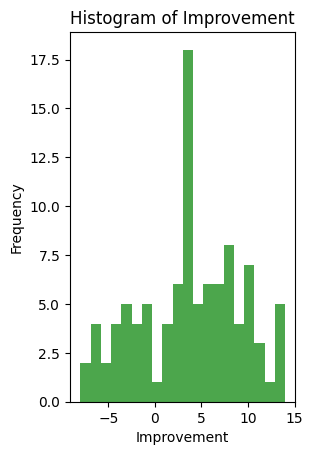

In [40]:
print("Histogram of Improvements")
print("")
plt.subplot(1, 2, 2)  # Create the second subplot
plt.hist(df['Improvement'], bins=20, color='green', alpha=0.7)
plt.xlabel('Improvement')
plt.ylabel('Frequency')
plt.title('Histogram of Improvement')
plt.show()

The Mean and Standard Deviation of the improvement values show that a large percentage of the improvement data points fall within one standard deviation of the mean value.  All data points came at or just inside two standard deviations.
This shows that outliers did not skew the data.

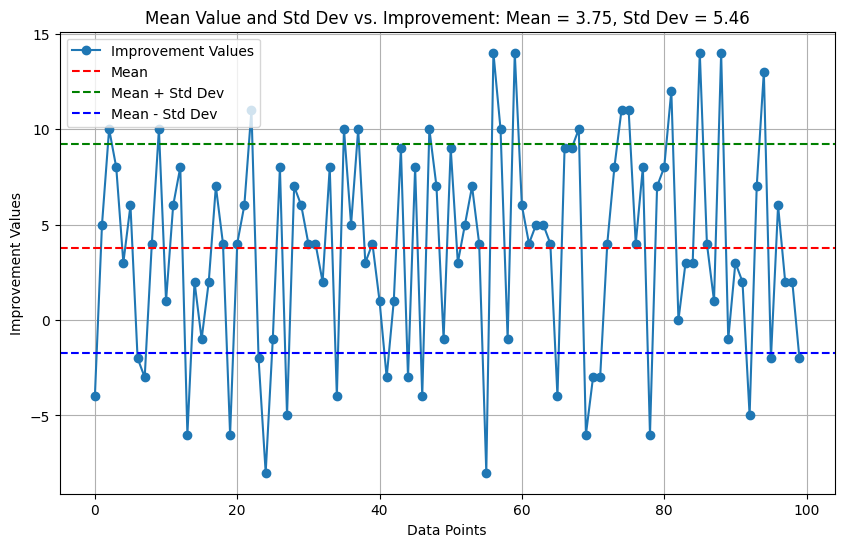

In [41]:
# Create a plot of the 'Improvement' values
plt.figure(figsize=(10, 6))
plt.plot(df['Improvement'], label='Improvement Values', marker='o')
plt.axhline(y=mean_improvement, color='red', linestyle='--', label='Mean')
plt.axhline(y=mean_improvement + std_dev_improvement, color='green', linestyle='--', label='Mean + Std Dev')
plt.axhline(y=mean_improvement - std_dev_improvement, color='blue', linestyle='--', label='Mean - Std Dev')
plt.xlabel('Data Points')
plt.ylabel('Improvement Values')
plt.title(f'Mean Value and Std Dev vs. Improvement: Mean = {mean_improvement:.2f}, Std Dev = {std_dev_improvement:.2f}')
plt.legend()
plt.grid(True)
plt.show()

The correlation value of .52 shows a positive linear correlation between hours studied and score improvement between tests.  

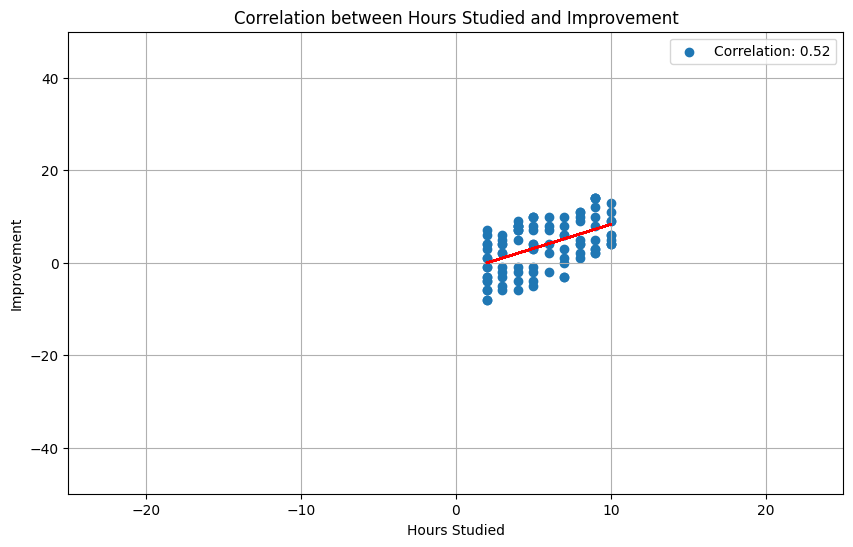

In [42]:
plt.figure(figsize=(10, 6))
plt.scatter(df['Study_Hours'], df['Improvement'], label=f'Correlation: {correlation:.2f}')
plt.xlabel('Hours Studied')
plt.ylabel('Improvement')
plt.title('Correlation between Hours Studied and Improvement')
plt.legend()
plt.xlim(-25, 25)  # Adjust these limits based on your data
plt.ylim(-50, 50)  # Adjust these limits based on your data
x = df['Study_Hours']
y = df['Improvement']
coefficients = np.polyfit(x, y, 1)
regression_line = np.poly1d(coefficients)
plt.plot(x, regression_line(x), color='red', label='Regression Line')

plt.grid(True)
plt.show()




Mean improvement

17 and 18 years olds showed the greatest improvement in test scores, with the females noticably outperforming in the improvement category at age 17.  The youngest age group, 16 year olds seemed to improve their scores the least.  

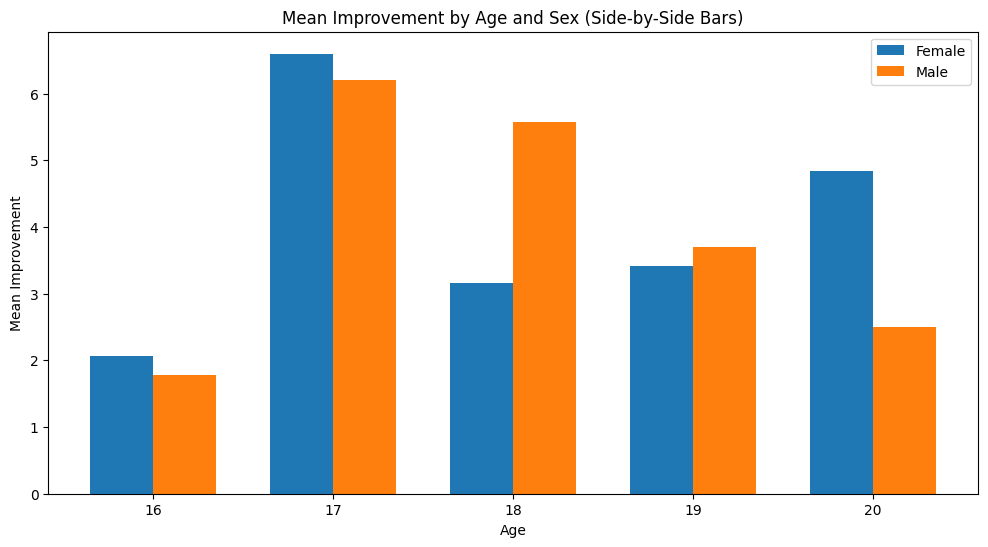

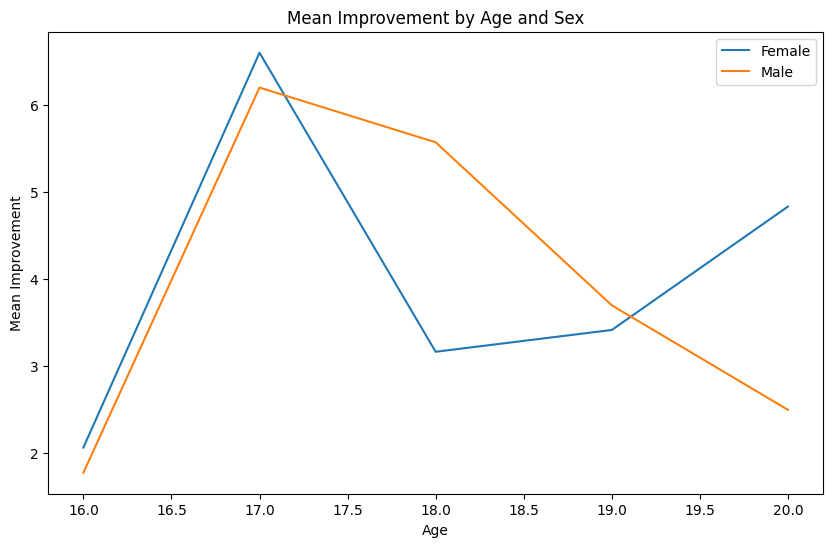

In [57]:
# Calculate mean improvement for all ages by sex
mean_improvement_all_ages_by_sex = df.groupby(['Sex', 'Age'])['Improvement'].mean().reset_index()

# Get unique ages and sexes
unique_ages = mean_improvement_all_ages_by_sex['Age'].unique()
unique_sexes = mean_improvement_all_ages_by_sex['Sex'].unique()
num_sexes = len(unique_sexes)

# Create a side-by-side bar chart for mean improvement by age and sex
fig, ax = plt.subplots(figsize=(12, 6))

bar_width = 0.35
index = np.arange(len(unique_ages))

# Iterate over unique sexes to create side-by-side bars
for i, sex in enumerate(unique_sexes):
    data_subset = mean_improvement_all_ages_by_sex[mean_improvement_all_ages_by_sex['Sex'] == sex]
    bar_positions = index + i * bar_width
    ax.bar(bar_positions, data_subset['Improvement'], bar_width, label=sex)

# Adjust the x-axis ticks and labels
ax.set_xlabel('Age')
ax.set_ylabel('Mean Improvement')
ax.set_title('Mean Improvement by Age and Sex (Side-by-Side Bars)')
ax.set_xticks(index + (num_sexes - 1) * bar_width / 2)
ax.set_xticklabels(unique_ages)
ax.legend()

# Show the plot
plt.show()

# Show the plot
plt.show()

# Plot age groups according to sex for improvement
fig, ax = plt.subplots(figsize=(10, 6))
for sex, group in mean_improvement_all_ages_by_sex.groupby('Sex'):
    ax.plot(group['Age'], group['Improvement'], label=sex)

# Plot mean improvement for both sexes
#ax.axhline(y=mean_improvement_both_sexes, color='k', linestyle='--', label='Both Sexes Mean Improvement')

# Add labels and legend
ax.set_xlabel('Age')
ax.set_ylabel('Mean Improvement')
ax.set_title('Mean Improvement by Age and Sex')
ax.legend()

# Show the plot
plt.show()






This is an attempt to find the improvement per hour per student.  I used an imputer to get rid of the zero values in the Improvement attribute I created for the dataframe.  I GOOGLE A LOT OF THIS.  THE CODE IS NOT MY WORK

Intersting note:  As you studied longer, the volatility came out of the improvement.  The longer you studied, the better chance of improving.

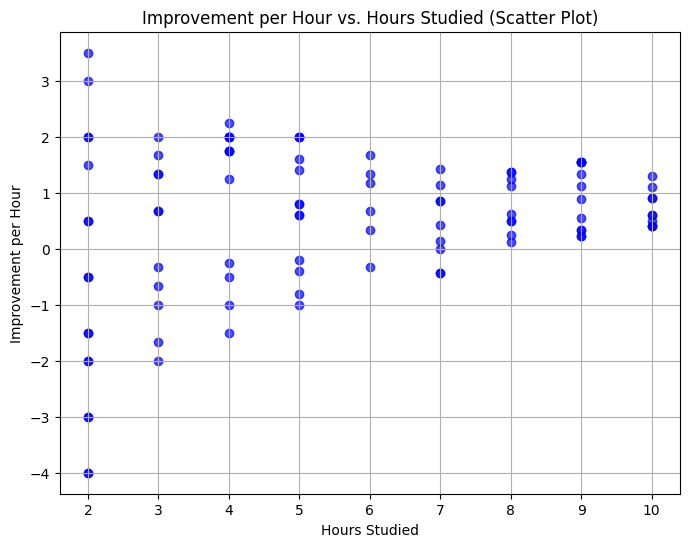

In [58]:
# Create an imputer to fill in zero values in the "Improvement" column with the mean of non-zero values
imputer = SimpleImputer(strategy='mean')

# Fit the imputer on non-zero values of "Improvement" and transform the column
df['Improvement'] = imputer.fit_transform(df['Improvement'].values.reshape(-1, 1))

# Create the "Improvement per Hour" attribute
df['Improvement_per_Hour'] = df['Improvement'] / df['Study_Hours']

# Create an imputer to fill in zero values in the "Improvement" column with the mean of non-zero values
imputer = SimpleImputer(strategy='mean')

# Fit the imputer on non-zero values of "Improvement" and transform the column
df['Improvement'] = imputer.fit_transform(df['Improvement'].values.reshape(-1, 1))

# Create the "Improvement per Hour" attribute
df['Improvement_per_Hour'] = df['Improvement'] / df['Study_Hours']

# Create a scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(df['Study_Hours'], df['Improvement_per_Hour'], c='blue', marker='o', alpha=0.7)
plt.xlabel('Hours Studied')
plt.ylabel('Improvement per Hour')
plt.title('Improvement per Hour vs. Hours Studied (Scatter Plot)')
plt.grid(True)
plt.show()